In [1]:
# https://strawberryfields.ai/photonics/demos/run_gate_visualization.html

import time

import strawberryfields as sf
from strawberryfields.ops import *

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

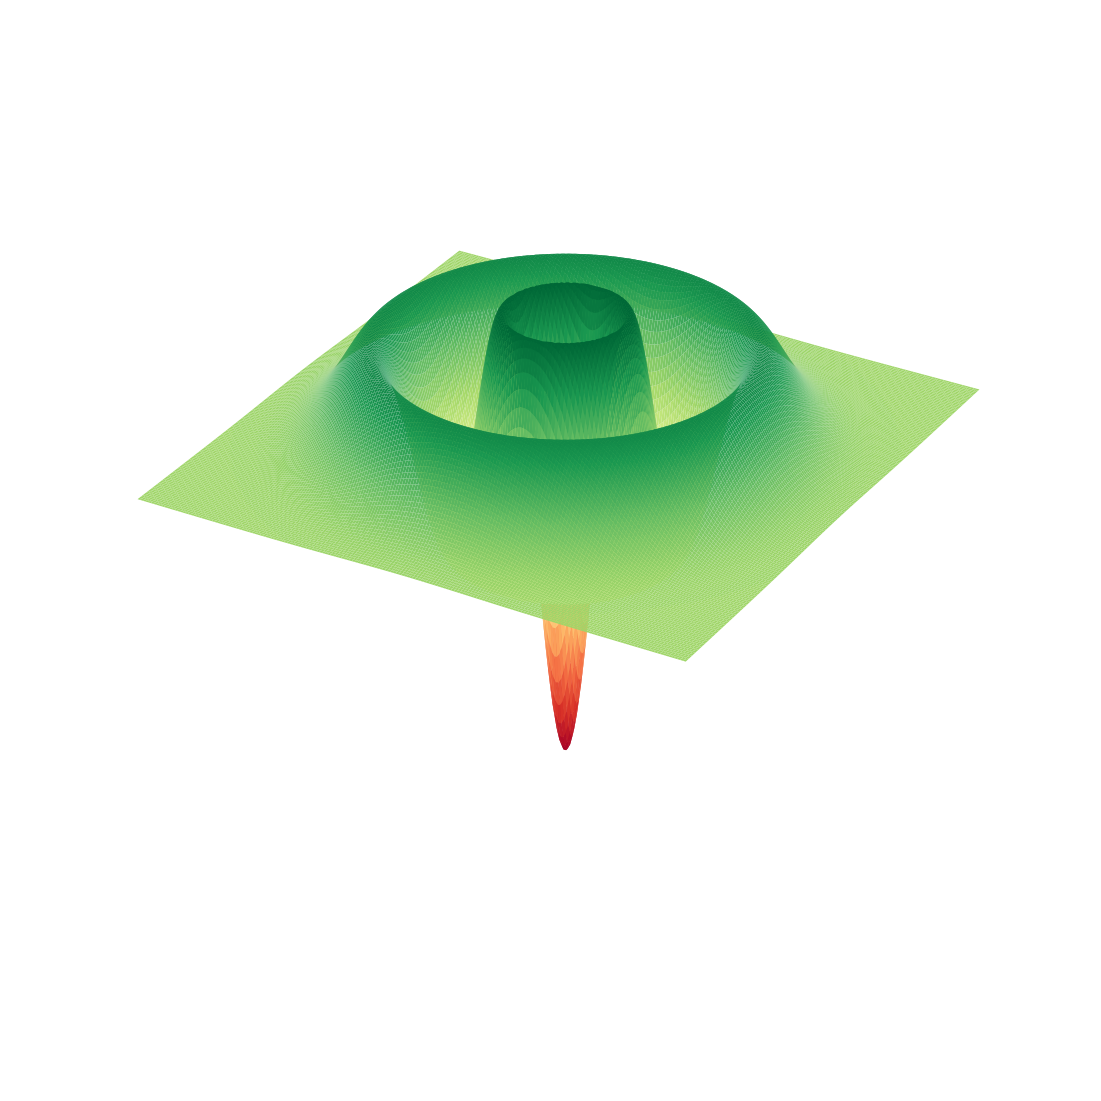

In [2]:
prog = sf.Program(2)

wire_id = 0

with prog.context as q:
    Fock(3) | q[wire_id]

eng = sf.Engine('fock', backend_options={"cutoff_dim": 50})
state = eng.run(prog, cutoff_dim=4).state

fig = plt.figure()
X = np.linspace(-5, 5, 200)
P = np.linspace(-5, 5, 200)
Z = state.wigner(wire_id, X, P)
X, P = np.meshgrid(X, P)
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, P, Z, cmap="RdYlGn", lw=0.5, rstride=1, cstride=1)
fig.set_size_inches(20.0, 20.0)
ax.set_axis_off()


In [3]:
prog = sf.Program(2)
eng = sf.Engine('fock', backend_options={"cutoff_dim": 10})

with prog.context as q:
    Fock(2)       | q[0]
    Fock(3)       | q[1]
    BSgate()      | (q[0], q[1])

    MeasureFock() | q[0]
    MeasureFock() | q[1]
    
results = eng.run(prog)

print(results.samples)

[[0 5]]
